In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
#from analytics_tools.analytics_tools3 import freq_discrete
%matplotlib inline

In [2]:
df = pd.read_excel('Data/churn.xlsx')

In [3]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [4]:
var_disc = [v for v in df.columns if v[:2]=='C_']
var_cont = [v for v in df.columns if v[:2]=='V_']

In [5]:
for v in var_disc:
    df[v] = (df[v]=='Yes').astype(int)

In [6]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,0,1,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,0,1,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,0,0,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,0,0,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,0,0,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [7]:
X = df[var_cont+var_disc].copy()
y = df['TARGET'].copy()

In [8]:
scaler = MinMaxScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X),columns=X.columns)

In [9]:
Xs.head()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,C_IP,C_VMP
0,0.633880,0.581395,0.841885,0.489362,0.492640,0.377778,0.693383,0.166667,0.500000,0.166667,0.0,1.0
1,0.519126,0.604651,0.433248,0.531915,0.484789,0.511111,0.734390,0.166667,0.776243,0.166667,0.0,1.0
2,0.683060,0.000000,0.756211,0.606383,0.174681,0.522222,0.349487,0.333333,0.662983,0.000000,0.0,0.0
3,0.289617,0.000000,0.305085,0.319149,0.622179,0.600000,0.543336,0.416667,0.701657,0.666667,0.0,0.0
4,0.852459,0.000000,0.303924,0.191489,0.106968,0.788889,0.259087,0.083333,0.588398,0.166667,0.0,0.0


In [10]:
Xt,Xv,yt,yv = train_test_split(Xs,y,train_size=0.7)

In [11]:
model = KNeighborsClassifier()

In [12]:
%%time
model.fit(Xt,yt)

CPU times: user 4.71 ms, sys: 205 µs, total: 4.92 ms
Wall time: 4.67 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
def metricas(model,Xt,Xv,yt,yv):
    print "Accuracy_Train %.2f, Accuracy_Validate %.2f "%(accuracy_score(y_pred=model.predict(Xt),y_true=yt),accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print "ROC_Train %.2f, ROC_Validate %.2f "%(roc_auc_score(y_score=model.predict_proba(Xt)[:,1],y_true=yt),roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))


In [14]:
metricas(model,Xt,Xv,yt,yv)

Accuracy_Train 0.93, Accuracy_Validate 0.88 
ROC_Train 0.97, ROC_Validate 0.83 


In [18]:
param_grid = dict(n_neighbors = range(100,550)
                )

In [19]:
grid = RandomizedSearchCV(cv=3,
                          verbose=True,
                          param_distributions=param_grid,
                          estimator=model,
                          n_jobs=-1,
                          n_iter=100,
                          scoring='roc_auc')

In [20]:
%%time
grid.fit(Xs,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.2s


CPU times: user 1.62 s, sys: 84.9 ms, total: 1.71 s
Wall time: 48 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   47.8s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_neighbors': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152...530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=True)

In [21]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=105, p=2,
           weights='uniform')

In [22]:
metricas(grid.best_estimator_,Xt,Xv,yt,yv)

Accuracy_Train 0.87, Accuracy_Validate 0.85 
ROC_Train 0.88, ROC_Validate 0.89 


(array([962., 428., 172.,  96.,  62.,  85.,  52.,  45.,  44.,  14.]),
 array([0.        , 0.04952381, 0.09904762, 0.14857143, 0.19809524,
        0.24761905, 0.29714286, 0.34666667, 0.39619048, 0.44571429,
        0.4952381 ]),
 <a list of 10 Patch objects>)

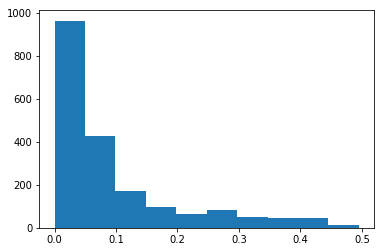

In [23]:
plt.hist(grid.best_estimator_.predict_proba(Xt)[:,1])